# Building a Sequential model

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D

## Build a feedforward neural network

In [2]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu', name='layer_1'),
    Dense(16, activation='relu'),
    Dense(10),
    Softmax()
])

In [3]:
# print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


#  Convolutional and pooling layers

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [5]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


# The compile method

In [7]:
# Define the model optimzer, loss function and metrics

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=[acc, mae])

In [8]:
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


# The fit method

In [11]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load the data

In [12]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [13]:
# print the shape of the training data

train_images.shape

(60000, 28, 28)

In [14]:
labels=[
    'T-shirt',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [15]:
print(train_labels[0])

9


In [16]:
# Rescale the image values so that they lie between 0 and 1

train_images = train_images / 255.
test_iamges  = test_images / 255.

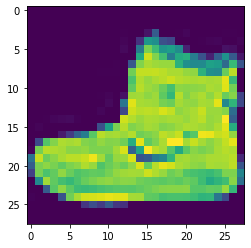

label: Ankle boot


In [17]:
# Display one of the images

i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f'label: {labels[train_labels[i]]}')

In [18]:
# Fit the model

history = model.fit(train_images[...,np.newaxis], 
          train_labels, 
          epochs=8, 
          batch_size=256)

Epoch 1/8
235/235 [==============================] - 4s 13ms/step - loss: 0.8296 - sparse_categorical_accuracy: 0.7227 - mean_absolute_error: 4.4181
Epoch 2/8
235/235 [==============================] - 3s 13ms/step - loss: 0.3797 - sparse_categorical_accuracy: 0.8684 - mean_absolute_error: 4.4190
Epoch 3/8
235/235 [==============================] - 3s 14ms/step - loss: 0.3361 - sparse_categorical_accuracy: 0.8803 - mean_absolute_error: 4.4373
Epoch 4/8
235/235 [==============================] - 3s 14ms/step - loss: 0.3169 - sparse_categorical_accuracy: 0.8868 - mean_absolute_error: 4.4487
Epoch 5/8
235/235 [==============================] - 3s 14ms/step - loss: 0.3075 - sparse_categorical_accuracy: 0.8905 - mean_absolute_error: 4.4191
Epoch 6/8
235/235 [==============================] - 3s 13ms/step - loss: 0.3014 - sparse_categorical_accuracy: 0.8930 - mean_absolute_error: 4.4238
Epoch 7/8
235/235 [==============================] - 3s 14ms/step - loss: 0.2853 - sparse_categorical_accu

## Plot training history

In [19]:
# Load the history into a pandas dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.569732,0.801950,4.420001
1,0.366856,0.872383,4.420000
2,0.336228,0.880700,4.420001
3,0.317035,0.886600,4.420001
4,0.304890,0.890683,4.420001


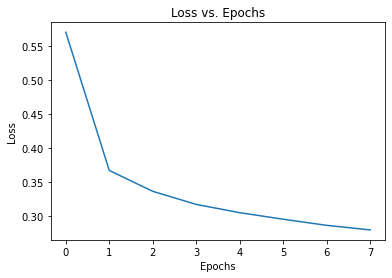

In [20]:
# Make a plot for the loss

loss_plot = df.plot(y='loss', title='Loss vs. Epochs', legend=False)
loss_plot.set(xlabel="Epochs", ylabel='Loss');

In [ ]:
# Make a plot for the accuracy

acc_plot = df.plot(y='sparse_categorical_accuracy', title='Accuracy vs. Epochs', legend=False)
acc_plot.set(xlabel="Epochs", ylabel='Accuracy');

# The evaluate and predict methods

In [21]:
import matplotlib.pyplot as plt
import numpy as np

### Evaluate the model on the test set

In [22]:
test_loss, test_accuracy, test_mae = model.evaluate(test_images[...,np.newaxis], test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 92.2200 - sparse_categorical_accuracy: 0.7933 - mean_absolute_error: 4.4200


### Make predictions from the model

In [23]:
test_images.shape

(10000, 28, 28)

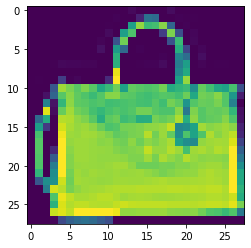

Label: Bag


In [24]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])
inx = 30

test_image = test_images[inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[inx]]}")

In [25]:
# Get the model predictions

pred = model.predict(test_image[np.newaxis,..., np.newaxis])

In [26]:
labels[pred.argmax()]

'Bag'